In [1]:
import os, sys
root_dir = os.path.dirname(os.getcwd())
sys.path.append(root_dir)

In [2]:
from configs import task_dataframe

In [3]:
import matplotlib as mpl
import pandas as pd
import numpy as np
import scipy.stats, os, json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict

In [4]:
df = pd.read_pickle(f'{root_dir}/results/results.pkl')

In [14]:
np.isnan(df)

True

# Configuration

In [6]:
def get_acc(model, mode, shot, task_id, metric, misleading):
    run_df = df[
        (df['model'] == model) &
        (df['file_type'] == mode) &
        (df['shot'] == shot) &
        (df['task_id'] == task_id) &
        (df['misleading'] == misleading)
    ]
    
    if len(run_df):
        # check whether it is nan or not
        if np.isnan(run_df[metric].item()):
            return 0
        else:
            return run_df[metric].item()/100
    else:
        return 0

In [7]:
get_acc(
    model = 'gpt4v',
    mode = 'text',
    shot = 2,
    task_id = 1,
    metric = 'overall',
    misleading = 0,
)

8.44

In [8]:
model_dict = {
    'image': {
        'emu': 'Emu',
        'emu2': 'Emu2',
        'gill': 'GILL',
        'seed': 'SEED-LLaMA',
    },
    'text': {
        'emu': 'Emu',
        'emu2': 'Emu2',
        'gill': 'GILL',
        'seed': 'SEED-LLaMA',
        'llava': 'LLaVA',
        'qwen': 'Qwen-VL',
        'gpt4v': 'GPT-4V',
    }
}

colors = ['#073B4C','#FFD166','#06D6A0','#118AB2', '#DD3497', '#AE017E', '#7A0177', '#49006A' ]
markers = ['o', '<', 's', 'p', 'P', 'X', 'D', 'd', 'v', 'h', 'H', '8', '>', '*', '1', '2', '3', '4', 'x', '+', '|', '_']
plt.rc('font', family='serif', serif='times new roman')
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
mpl.rcParams['patch.linewidth']=0.5 #width of the boundary of legend

# Overall Perforamnce Report

In [9]:
def get_shot_bars(
    num_shot,
    task_inference,
    model_mode,
    metric,
    misleading,
):
    task_df = pd.DataFrame(task_dataframe).T
    results = []
    if task_inference == 'object':
        tasks = task_df[(task_df.theta_space == 'object') | (task_df.theta_space == 'animal')]
    else:
        tasks = task_df[(task_df.theta_space != 'object') & (task_df.theta_space != 'animal')]
    for task_id in tasks.index:
        for model_label in model_dict[model_mode]:
            acc = get_acc(
                model = model_label,
                mode = model_mode,
                shot = num_shot,
                task_id = task_id,
                metric = metric,
                misleading = misleading,
            )
            results.append({
                'acc': acc,
                'model': model_label,
                'task_id': task_id,
                'task': task_dataframe[task_id]['task_name']
            })
            
    results_df = pd.DataFrame(results)
    return results_df


In [10]:
get_shot_bars(
    num_shot = 2,
    task_inference ='object',
    model_mode = 'text',
    metric = 'overall',
    misleading = 0,
)

,acc,model,task_id,task
0,1.46,emu,1,Color-I
1,0.01,emu2,1,Color-I
2,0.77,gill,1,Color-I
3,1.29,seed,1,Color-I
4,0.49,llava,1,Color-I
5,4.75,qwen,1,Color-I
6,8.44,gpt4v,1,Color-I
7,4.04,emu,3,Background-I
8,0.12,emu2,3,Background-I
9,0.35,gill,3,Background-I


In [11]:
for model_mode in ['image', 'text']:
    for misleading in [0,1]:
        for task_inference in ['object', 'detail']:
            bar_width = 2.5
            # ask_inference = task_inference
            # model_mode = model_mode
            width, height = 35, 5
            # misleading = misleading
            metric = 'overall'
            wspace = 5
            barspace = 15

            r1_data = get_shot_bars(
                num_shot = 2,
                task_inference = task_inference,
                model_mode = model_mode,
                metric = metric,
                misleading = misleading,
            )
            r1_data = [{'position': barspace*i + wspace*(i//len(model_dict[model_mode])), **r1_data.iloc[i]} for i in range(len(r1_data))]


            r2_data = get_shot_bars(
                num_shot = 4,
                task_inference = task_inference,
                model_mode = model_mode,
                metric = metric,
                misleading = misleading,
            )
            r2_data = [{'position': barspace*i + wspace*(i//len(model_dict[model_mode])) + bar_width, **r2_data.iloc[i]} for i in range(len(r2_data))]

            r3_data = get_shot_bars(
                num_shot = 6,
                task_inference = task_inference,
                model_mode = model_mode,
                metric = metric,
                misleading = misleading,
            )
            r3_data = [{'position': barspace*i + wspace*(i//len(model_dict[model_mode])) + 2 * bar_width, **r3_data.iloc[i]} for i in range(len(r3_data))]

            r4_data = get_shot_bars(
                num_shot = 8,
                task_inference = task_inference,
                model_mode = model_mode,
                metric = metric,
                misleading = misleading,
            )
            r4_data = [{'position': barspace*i + wspace*(i//len(model_dict[model_mode])) + 3 * bar_width, **r4_data.iloc[i]} for i in range(len(r4_data))]


            fig, ax = plt.subplots(nrows = 1, ncols = 1)
            fig.subplots_adjust(left=0.025, bottom=.41, right=0.999, top=.85, wspace=0, hspace = 0.3) #margin of the figure
            fig.set_size_inches(width, height) 

            xticks, xticklabels = [], []
            for i, (v1, v2, v3, v4) in enumerate(zip(r1_data, r2_data, r3_data, r4_data)):
                ax.bar(v1['position'], v1['acc'], width = bar_width, color = colors[0], label = '2-shot')
                ax.bar(v2['position'], v2['acc'], width = bar_width, color = colors[1], label = '4-shot')
                ax.bar(v3['position'], v3['acc'], width = bar_width, color = colors[2], label = '6-shot')
                ax.bar(v4['position'], v4['acc'], width = bar_width, color = colors[3], label = '8-shot')
                xticks.append((v2['position'] + v3['position'])/2)
                xticklabels.append(model_dict[model_mode][v3['model']])
                
                if i % len(model_dict[model_mode]) == (len(model_dict[model_mode])-1)//2:
                    ax.text(v2['position'], 0.85, v2['task'], fontsize=22, fontweight='bold', ha='center')
                    
                if i % len(model_dict[model_mode]) == (len(model_dict[model_mode])-1): 
                    if not i // len(model_dict[model_mode]) == 4:
                        ax.axvline(x=v3['position'] + wspace, color='grey', linestyle='-', linewidth=1)
                
                # add legend
                if i == 0:
                    ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.38), ncol=4, fontsize=22)
                    
            ax.set_xticks(xticks)
            ax.set_xlim(-wspace, wspace + barspace*(len(r1_data)-1) + wspace*(len(r1_data)//len(model_dict[model_mode])))
            # break the line of the xticklabels
            ax.set_xticklabels(xticklabels, rotation = 90)
            ax.set_yticks(np.arange(0, 1.2, 0.2))
            # set ylabel 
            ax.set_ylabel('Accuracy', fontsize=22)
            save_path = f'{root_dir}/figures/{task_inference}_inference_m_{misleading}_{model_mode}.pdf'
            os.makedirs(os.path.dirname(save_path), exist_ok=True)
            fig.savefig(save_path)
            plt.show()

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

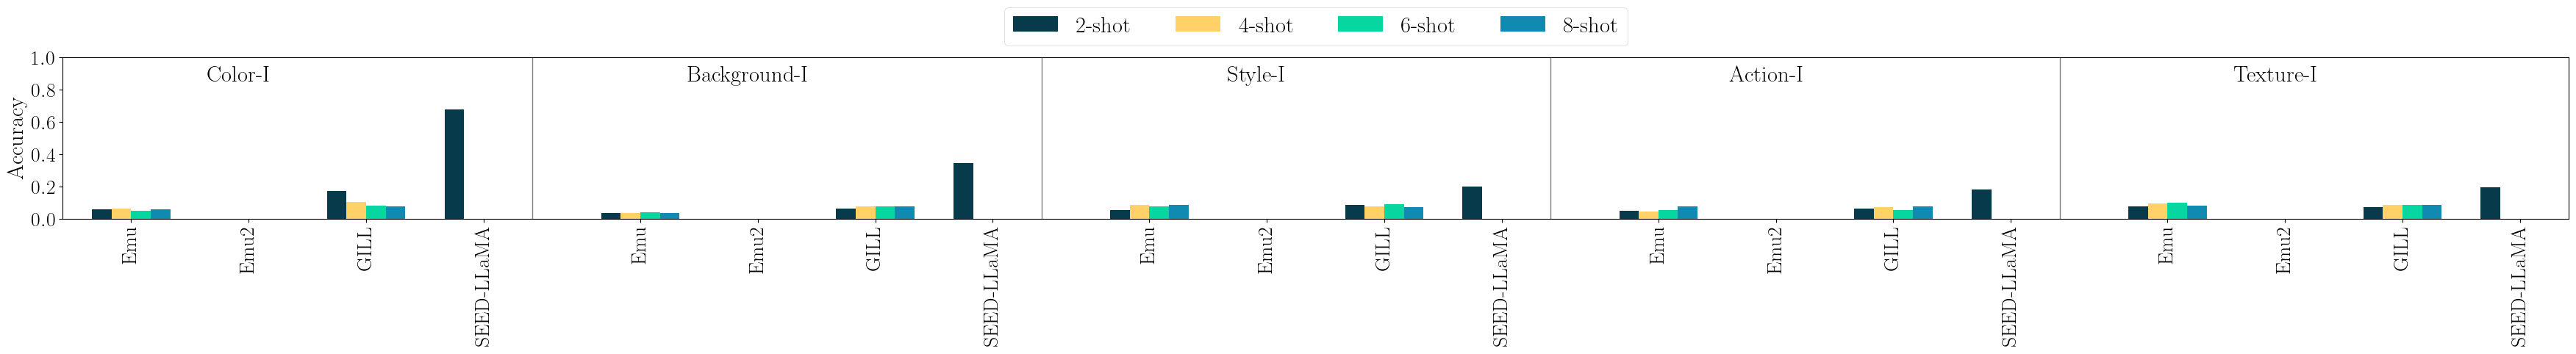

In [ ]:
bar_width = 2.5
task_inference = 'object'
model_mode = 'image'
width, height = 35, 5
misleading = 0
metric = 'overall'
wspace = 5
barspace = 15

r1_data = get_shot_bars(
    num_shot = 2,
    task_inference = task_inference,
    model_mode = model_mode,
    metric = metric,
    misleading = misleading,
)
r1_data = [{'position': barspace*i + wspace*(i//len(model_dict[model_mode])), **r1_data.iloc[i]} for i in range(len(r1_data))]


r2_data = get_shot_bars(
    num_shot = 4,
    task_inference = task_inference,
    model_mode = model_mode,
    metric = metric,
    misleading = misleading,
)
r2_data = [{'position': barspace*i + wspace*(i//len(model_dict[model_mode])) + bar_width, **r2_data.iloc[i]} for i in range(len(r2_data))]

r3_data = get_shot_bars(
    num_shot = 6,
    task_inference = task_inference,
    model_mode = model_mode,
    metric = metric,
    misleading = misleading,
)
r3_data = [{'position': barspace*i + wspace*(i//len(model_dict[model_mode])) + 2 * bar_width, **r3_data.iloc[i]} for i in range(len(r3_data))]

r4_data = get_shot_bars(
    num_shot = 8,
    task_inference = task_inference,
    model_mode = model_mode,
    metric = metric,
    misleading = misleading,
)
r4_data = [{'position': barspace*i + wspace*(i//len(model_dict[model_mode])) + 3 * bar_width, **r4_data.iloc[i]} for i in range(len(r4_data))]


fig, ax = plt.subplots(nrows = 1, ncols = 1)
fig.subplots_adjust(left=0.025, bottom=.41, right=0.999, top=.85, wspace=0, hspace = 0.3) #margin of the figure
fig.set_size_inches(width, height) 

xticks, xticklabels = [], []
for i, (v1, v2, v3, v4) in enumerate(zip(r1_data, r2_data, r3_data, r4_data)):
    ax.bar(v1['position'], v1['acc'], width = bar_width, color = colors[0], label = '2-shot')
    ax.bar(v2['position'], v2['acc'], width = bar_width, color = colors[1], label = '4-shot')
    ax.bar(v3['position'], v3['acc'], width = bar_width, color = colors[2], label = '6-shot')
    ax.bar(v4['position'], v4['acc'], width = bar_width, color = colors[3], label = '8-shot')
    xticks.append((v2['position'] + v3['position'])/2)
    xticklabels.append(model_dict[model_mode][v3['model']])
    
    if i % len(model_dict[model_mode]) == (len(model_dict[model_mode])-1)//2:
        ax.text(v2['position'], 0.85, v2['task'], fontsize=22, fontweight='bold', ha='center')
        
    if i % len(model_dict[model_mode]) == (len(model_dict[model_mode])-1): 
        if not i // len(model_dict[model_mode]) == 4:
            ax.axvline(x=v3['position'] + wspace, color='grey', linestyle='-', linewidth=1)
    
    # add legend
    if i == 0:
        ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.38), ncol=4, fontsize=22)
        
ax.set_xticks(xticks)
ax.set_xlim(-wspace, wspace + barspace*(len(r1_data)-1) + wspace*(len(r1_data)//len(model_dict[model_mode])))
# break the line of the xticklabels
ax.set_xticklabels(xticklabels, rotation = 90)
ax.set_yticks(np.arange(0, 1.2, 0.2))
# set ylabel 
ax.set_ylabel('Accuracy', fontsize=22)
save_path = f'{root_dir}/figures/{task_inference}_inference_m_{misleading}_{model_mode}.pdf'
os.makedirs(os.path.dirname(save_path), exist_ok=True)
fig.savefig(save_path)
plt.show()

# Analyze the effect of number of demonstrations

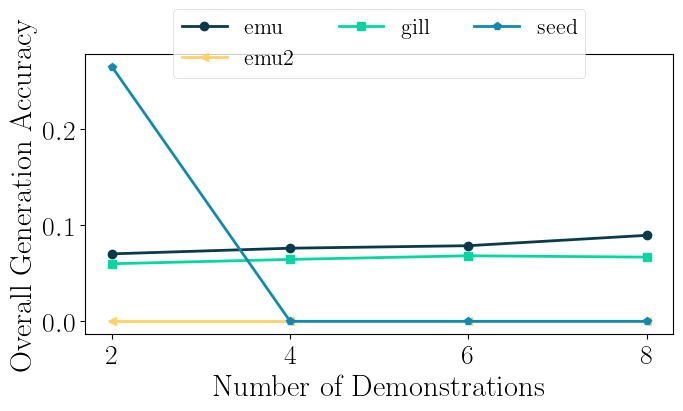

In [ ]:
model_mode = 'image'
metric = 'overall'
misleading = 0
width, height = 7,4
num_shots = [2,4,6,8]

results = {}
for model in model_dict[model_mode]:
    results[model] = defaultdict(list)
    for shot in num_shots:
        for task_id in task_dataframe:
            results[model][shot].append(get_acc(
                model = model,
                mode = model_mode,
                shot = shot,
                task_id = task_id,
                metric = metric,
                misleading = misleading,
            ))
        
        results[model][shot] = np.mean(results[model][shot])
results = pd.DataFrame(results)

fig, ax = plt.subplots(nrows = 1, ncols = 1)
fig.subplots_adjust(left=0.15, bottom=.18, right=0.99, top=.88, wspace=0, hspace = 0.3) #margin of the figure
fig.set_size_inches(width, height) 

for i, model in enumerate(results):
    results[model].plot(marker = markers[i], color = colors[i], ax = ax, label = model, linewidth = 2, label = model_dict[model_mode][model])
ax.set_xticks(num_shots)
ax.set_xticklabels(num_shots)
ax.set_xlabel('Number of Demonstrations', fontsize=22)
ax.set_ylabel('Overall Generation Accuracy', fontsize=22)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=3, fontsize=16)

fig.savefig(f'{root_dir}/figures/impact_demos.pdf')
plt.show()